### Read in corpus of data and create list of intervals

In [140]:
from music21 import *
import matplotlib.pyplot as plt
import numpy as np

# search for end of a pattern in a 1-dim array
def patternsearch(seq, pat, indices=None):
    if indices is None:
        indices = np.arange(len(seq))

    if len(pat) == 0:
        return indices
    found = (seq == pat[0]).nonzero()[0]
    inind = np.in1d(found, indices)
    if len(pat) == 1:
        return found[inind]
    elif np.any(inind):
        return patternsearch(seq, pat[1:], indices=found[inind]+1)
    else:
        return []

# find conditional probability of each element of pattern in array    
def conditProb(seq, pat, pNum=None):
    if not isinstance(seq, np.ndarray):
        seq = np.array(seq)
    if pNum is None:
        pNum = len(pat)
    problist = []
    for pt in range(len(pat)):
        strt = pt - pNum
        strt = 0 if strt < 0 else strt
        eop = patternsearch(seq, pat[strt:pt])
        
        if len(eop) == 0:
            problist.append(0)
        else:
            # remove any pattern that has reached the end
            if pt != len(pat):
                eop = eop[eop != len(seq)-1]
            seqDist = seq[eop + 1]

            problist.append(np.sum(seqDist == pat[pt])/len(seqDist))
    
    return problist

### Compile corpus of tonal composers

In [2]:
composers = ['Bach', 'Beethoven', 'Mozart', 'Corelli', 'Chopin', 'Handel', 'Haydn', 'Palestrina']
# composers = ['Bach']
database = corpus.search(composers[0], 'Composer')
for cmp in composers[1:]:
    database = database.union(corpus.search(cmp, 'Composer'))
intrvlist = []
cnt = 0
for thisPiece in database:
    print('{} of {} total pieces'.format(cnt, len(database)))
    thisScore = thisPiece.parse()
    for thisPart in thisScore.parts:
        testNotes = thisPart.flat.getElementsByClass('Note')
        for n1, n2 in zip(testNotes[:-1], testNotes[1:]):
            intrvlist.append(interval.Interval(n1,n2).semitones)

    cnt += 1


# plt.hist(intrvlist, bins=np.arange(-19,21)-.5)
# plt.show()

0 of 1713 total pieces
1 of 1713 total pieces
2 of 1713 total pieces
3 of 1713 total pieces
4 of 1713 total pieces
5 of 1713 total pieces
6 of 1713 total pieces
7 of 1713 total pieces
8 of 1713 total pieces
9 of 1713 total pieces
10 of 1713 total pieces
11 of 1713 total pieces
12 of 1713 total pieces
13 of 1713 total pieces
14 of 1713 total pieces
15 of 1713 total pieces
16 of 1713 total pieces
17 of 1713 total pieces
18 of 1713 total pieces
19 of 1713 total pieces
20 of 1713 total pieces
21 of 1713 total pieces
22 of 1713 total pieces
23 of 1713 total pieces
24 of 1713 total pieces
25 of 1713 total pieces
26 of 1713 total pieces
27 of 1713 total pieces
28 of 1713 total pieces
29 of 1713 total pieces
30 of 1713 total pieces
31 of 1713 total pieces
32 of 1713 total pieces
33 of 1713 total pieces
34 of 1713 total pieces
35 of 1713 total pieces
36 of 1713 total pieces
37 of 1713 total pieces
38 of 1713 total pieces
39 of 1713 total pieces
40 of 1713 total pieces
41 of 1713 total pieces
42

334 of 1713 total pieces
335 of 1713 total pieces
336 of 1713 total pieces
337 of 1713 total pieces
338 of 1713 total pieces
339 of 1713 total pieces
340 of 1713 total pieces
341 of 1713 total pieces
342 of 1713 total pieces
343 of 1713 total pieces
344 of 1713 total pieces
345 of 1713 total pieces
346 of 1713 total pieces
347 of 1713 total pieces
348 of 1713 total pieces
349 of 1713 total pieces
350 of 1713 total pieces
351 of 1713 total pieces
352 of 1713 total pieces
353 of 1713 total pieces
354 of 1713 total pieces
355 of 1713 total pieces
356 of 1713 total pieces
357 of 1713 total pieces
358 of 1713 total pieces
359 of 1713 total pieces
360 of 1713 total pieces
361 of 1713 total pieces
362 of 1713 total pieces
363 of 1713 total pieces
364 of 1713 total pieces
365 of 1713 total pieces
366 of 1713 total pieces
367 of 1713 total pieces
368 of 1713 total pieces
369 of 1713 total pieces
370 of 1713 total pieces
371 of 1713 total pieces
372 of 1713 total pieces
373 of 1713 total pieces


663 of 1713 total pieces
664 of 1713 total pieces
665 of 1713 total pieces
666 of 1713 total pieces
667 of 1713 total pieces
668 of 1713 total pieces
669 of 1713 total pieces
670 of 1713 total pieces
671 of 1713 total pieces
672 of 1713 total pieces
673 of 1713 total pieces
674 of 1713 total pieces
675 of 1713 total pieces
676 of 1713 total pieces
677 of 1713 total pieces
678 of 1713 total pieces
679 of 1713 total pieces
680 of 1713 total pieces
681 of 1713 total pieces
682 of 1713 total pieces
683 of 1713 total pieces
684 of 1713 total pieces
685 of 1713 total pieces
686 of 1713 total pieces
687 of 1713 total pieces
688 of 1713 total pieces
689 of 1713 total pieces
690 of 1713 total pieces
691 of 1713 total pieces
692 of 1713 total pieces
693 of 1713 total pieces
694 of 1713 total pieces
695 of 1713 total pieces
696 of 1713 total pieces
697 of 1713 total pieces
698 of 1713 total pieces
699 of 1713 total pieces
700 of 1713 total pieces
701 of 1713 total pieces
702 of 1713 total pieces


991 of 1713 total pieces
992 of 1713 total pieces
993 of 1713 total pieces
994 of 1713 total pieces
995 of 1713 total pieces
996 of 1713 total pieces
997 of 1713 total pieces
998 of 1713 total pieces
999 of 1713 total pieces
1000 of 1713 total pieces
1001 of 1713 total pieces
1002 of 1713 total pieces
1003 of 1713 total pieces
1004 of 1713 total pieces
1005 of 1713 total pieces
1006 of 1713 total pieces
1007 of 1713 total pieces
1008 of 1713 total pieces
1009 of 1713 total pieces
1010 of 1713 total pieces
1011 of 1713 total pieces
1012 of 1713 total pieces
1013 of 1713 total pieces
1014 of 1713 total pieces
1015 of 1713 total pieces
1016 of 1713 total pieces
1017 of 1713 total pieces
1018 of 1713 total pieces
1019 of 1713 total pieces
1020 of 1713 total pieces
1021 of 1713 total pieces
1022 of 1713 total pieces
1023 of 1713 total pieces
1024 of 1713 total pieces
1025 of 1713 total pieces
1026 of 1713 total pieces
1027 of 1713 total pieces
1028 of 1713 total pieces
1029 of 1713 total pi

1307 of 1713 total pieces
1308 of 1713 total pieces
1309 of 1713 total pieces
1310 of 1713 total pieces
1311 of 1713 total pieces
1312 of 1713 total pieces
1313 of 1713 total pieces
1314 of 1713 total pieces
1315 of 1713 total pieces
1316 of 1713 total pieces
1317 of 1713 total pieces
1318 of 1713 total pieces
1319 of 1713 total pieces
1320 of 1713 total pieces
1321 of 1713 total pieces
1322 of 1713 total pieces
1323 of 1713 total pieces
1324 of 1713 total pieces
1325 of 1713 total pieces
1326 of 1713 total pieces
1327 of 1713 total pieces
1328 of 1713 total pieces
1329 of 1713 total pieces
1330 of 1713 total pieces
1331 of 1713 total pieces
1332 of 1713 total pieces
1333 of 1713 total pieces
1334 of 1713 total pieces
1335 of 1713 total pieces
1336 of 1713 total pieces
1337 of 1713 total pieces
1338 of 1713 total pieces
1339 of 1713 total pieces
1340 of 1713 total pieces
1341 of 1713 total pieces
1342 of 1713 total pieces
1343 of 1713 total pieces
1344 of 1713 total pieces
1345 of 1713

1624 of 1713 total pieces
1625 of 1713 total pieces
1626 of 1713 total pieces
1627 of 1713 total pieces
1628 of 1713 total pieces
1629 of 1713 total pieces
1630 of 1713 total pieces
1631 of 1713 total pieces
1632 of 1713 total pieces
1633 of 1713 total pieces
1634 of 1713 total pieces
1635 of 1713 total pieces
1636 of 1713 total pieces
1637 of 1713 total pieces
1638 of 1713 total pieces
1639 of 1713 total pieces
1640 of 1713 total pieces
1641 of 1713 total pieces
1642 of 1713 total pieces
1643 of 1713 total pieces
1644 of 1713 total pieces
1645 of 1713 total pieces
1646 of 1713 total pieces
1647 of 1713 total pieces
1648 of 1713 total pieces
1649 of 1713 total pieces
1650 of 1713 total pieces
1651 of 1713 total pieces
1652 of 1713 total pieces
1653 of 1713 total pieces
1654 of 1713 total pieces
1655 of 1713 total pieces
1656 of 1713 total pieces
1657 of 1713 total pieces
1658 of 1713 total pieces
1659 of 1713 total pieces
1660 of 1713 total pieces
1661 of 1713 total pieces
1662 of 1713

### Get counts of 2-Interal transition probabilities in corpus

In [3]:
intrvarray = np.array(intrvlist)
# intrvarray = intrvarray[intrvarray.nonzero()]
possIntervals = np.arange(-5, 6)
counts2D = np.zeros([len(possIntervals), len(possIntervals)])
for intrv1 in possIntervals:
    for intrv2 in possIntervals:
        eop = patternsearch(intrvarray, [intrv1, intrv2])
        counts2D[intrv1-min(possIntervals), intrv2-min(possIntervals)] = len(eop)

### Plot interval counts in 2-dimensional image

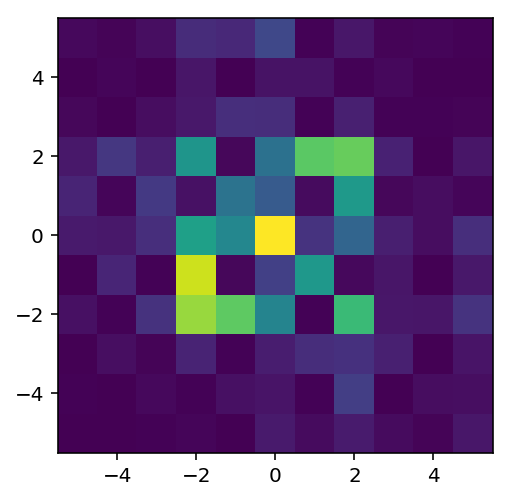

In [4]:
binedges = np.append(possIntervals, possIntervals[-1]+1) - 0.5
x,y = np.meshgrid(binedges, binedges)
plt.pcolormesh(x, y, (counts2D))
plt.axis('equal'); plt.axis('square')
plt.show()

## Read in a text file of melody notes and get predictability

### TODO: 
 - ~~Get probability of occurence of a string of notes~~
 - **the shape of the predictions for next note**
 - ~~the transition probability to the actual note~~

In [5]:
fname = 'all.txt'

lines = [line.rstrip('\n') for line in open(fname)]

melody = lines[2]
melodyList = melody.split(' ')
intrvPtrn = []
for n1, n2 in zip(melodyList[:-1], melodyList[1:]):
    intrvPtrn.append(interval.Interval(note.Note(n1), note.Note(n2)).semitones)

intervNum = 8
eop = patternsearch(np.array(intrvlist), intrvPtrn[:intervNum])    
print(len(eop)/(len(intrvlist) - intervNum))

0.00013731548232063164


As the melodies we were given were exceedingly rare in the corpus, it might be better to draw sequences from the corpus itself and select them on the basis of their predictability

### First plot a histogram of log probabilities of melodies of a certain length

(array([ 4.,  2.,  9.,  6., 21., 12., 24., 32., 35., 54., 50., 69., 70.,
        71., 81., 81., 79., 78., 56., 43., 41., 34., 17., 11.,  6.,  3.,
         1.,  2.,  1.,  7.]),
 array([-12.32051678, -11.90983289, -11.49914899, -11.0884651 ,
        -10.67778121, -10.26709732,  -9.85641342,  -9.44572953,
         -9.03504564,  -8.62436175,  -8.21367785,  -7.80299396,
         -7.39231007,  -6.98162618,  -6.57094228,  -6.16025839,
         -5.7495745 ,  -5.3388906 ,  -4.92820671,  -4.51752282,
         -4.10683893,  -3.69615503,  -3.28547114,  -2.87478725,
         -2.46410336,  -2.05341946,  -1.64273557,  -1.23205168,
         -0.82136779,  -0.41068389,   0.        ]),
 <a list of 30 Patch objects>)

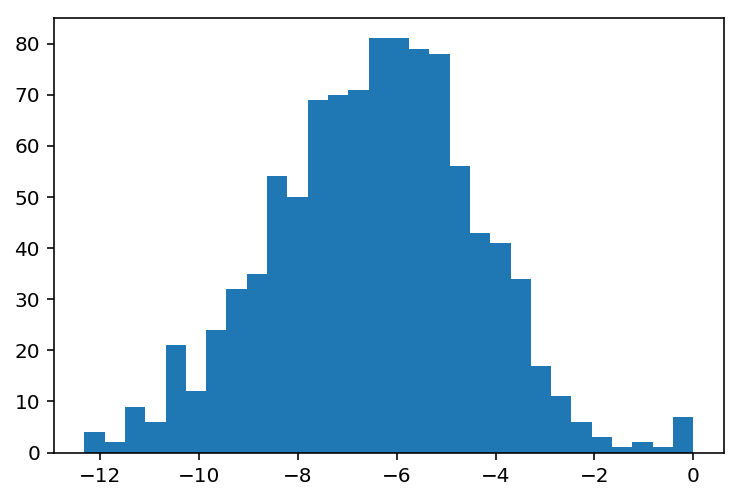

In [7]:
from scipy.stats import mode
from copy import deepcopy as dc
intrvBach = np.array(intrvlist)
# intrvBach = intrvBach[intrvBach.nonzero()]
# create the number of interval
intrvNum = 4
intrvPtrn = []

# a function to guide choice of next note

# random choice
func = np.random.choice

# # some percentile of predictability
# def choosepred(x, predPerc):
#     counts, semis = np.histogram(x, bins=np.arange(-12,14)-0.5)
#     semis = semis[:-1] + .5
#     semis, counts = semis[counts != 0], counts[counts != 0]
#     cntSel = np.percentile(counts, predPerc)
#     semSel = np.random.choice(semis[cntSel == counts])
#     return semSel
# func = lambda x: choosepred(x, 50)

# # the most common following note
# func = lambda x: mode(x)[0][0]

# get an interval pattern
intrvDist = dc(intrvBach)
predNum = intrvNum
iterations = 1000
prodProbs = []
for it in range(iterations):
    intsprobs = []
    for iN in range(intrvNum):
        # choose next interval
        nextIntrv = func(intrvDist)
        # save it and record the probability
        intrvPtrn.append(nextIntrv)
        intrvprob = np.sum(intrvDist == nextIntrv)/len(intrvDist)
        intsprobs.append(intrvprob)
        # Identify all the locations of the new updated pattern
        eop = patternsearch(intrvBach, intrvPtrn[-predNum:])
        # remove any pattern that has reached the end
        eop = eop[eop != len(intrvBach)-1]
        # generate new distribution for the following note
        intrvDist = intrvBach[eop+1]

    prodProbs.append(np.prod(intsprobs))

plt.hist(np.log(prodProbs), 30)

## Select melodies on the basis of their probability of occurrence over many iterations

In [373]:
iterations = 1500
intrvBach = np.array(intrvlist)
intrvBach = intrvBach[intrvBach.nonzero()]
intrvNum = 8

tselFun = lambda x: np.percentile(x, np.arange(5,96,10))
logprobs = np.zeros(iterations)
targetprobs = tselFun(logprobs)
selectIntervals = np.zeros([len(targetProbs), intrvNum])
selProbs = 100*np.ones_like(targetProbs)
for it in range(iterations):
    intsprobs = []
    intrvPtrn = []

    # get an interval pattern
    intrvDist = dc(intrvBach)
    for iN in range(intrvNum):
        # choose next interval
        nextIntrv = func(intrvDist)
        # save it and record the probability
        intrvPtrn.append(nextIntrv)
        intrvprob = np.sum(intrvDist == nextIntrv)/len(intrvDist)
        intsprobs.append(intrvprob)
        # Identify all the locations of the new updated pattern
        eop = patternsearch(intrvBach, intrvPtrn[-predNum:])
        # remove any pattern that has reached the end
        eop = eop[eop != len(intrvBach)-1]
        # generate new distribution for the following note
        intrvDist = intrvBach[eop+1]
    # sum up transition probabilities (TP) for the interval string    
    itProb = np.sum(np.log(intsprobs))
    # save TP for each iteration
    logprobs[it] = itProb

    # create target probabilities based on the distribution
    targetProbs = tselFun(logprobs[:it+1])
    # figure out where this one should go
    indx = np.argmin((itProb - targetProbs)**2)
    # check if it's closer to the target probability than the current item being held
    itDist = (itProb - targetProbs[indx])**2
    selDist = (selProbs[indx] - targetProbs[indx])**2
    if itDist < selDist and 12 not in np.abs(intrvPtrn):
        print('Updating target {} on iteration {} of {}'.format(indx, it, iterations))
        selectIntervals[indx] = np.array(intrvPtrn)
        selProbs[indx] = itProb

Updating target 0 on iteration 0 of 1500
Updating target 5 on iteration 2 of 1500
Updating target 6 on iteration 3 of 1500
Updating target 5 on iteration 4 of 1500
Updating target 5 on iteration 5 of 1500
Updating target 8 on iteration 6 of 1500
Updating target 2 on iteration 7 of 1500
Updating target 1 on iteration 8 of 1500
Updating target 9 on iteration 10 of 1500
Updating target 2 on iteration 11 of 1500
Updating target 0 on iteration 12 of 1500
Updating target 0 on iteration 13 of 1500
Updating target 3 on iteration 15 of 1500
Updating target 2 on iteration 16 of 1500
Updating target 4 on iteration 17 of 1500
Updating target 7 on iteration 19 of 1500
Updating target 9 on iteration 23 of 1500
Updating target 3 on iteration 24 of 1500
Updating target 4 on iteration 25 of 1500
Updating target 8 on iteration 27 of 1500
Updating target 9 on iteration 28 of 1500
Updating target 0 on iteration 30 of 1500
Updating target 9 on iteration 31 of 1500
Updating target 8 on iteration 32 of 1500


## Plot the melodies and their probability of occurence underneath

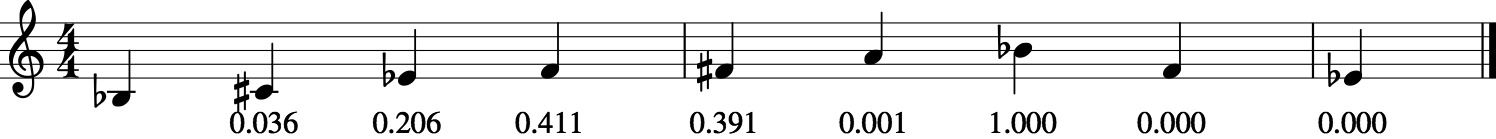

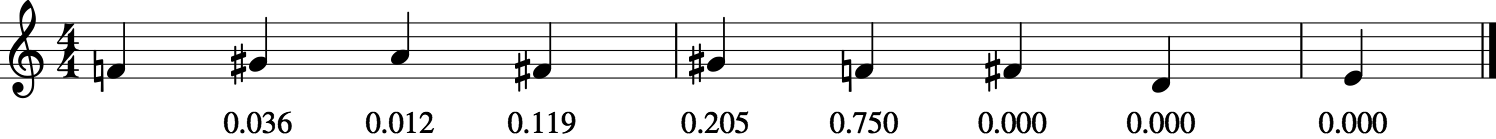

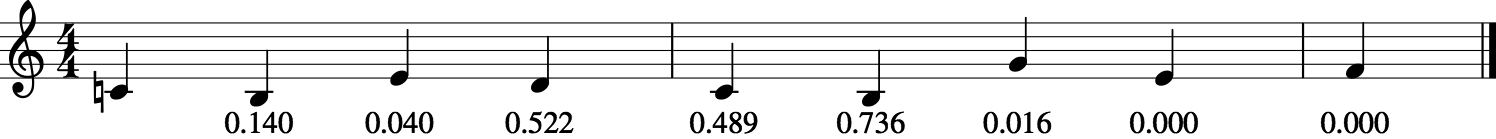

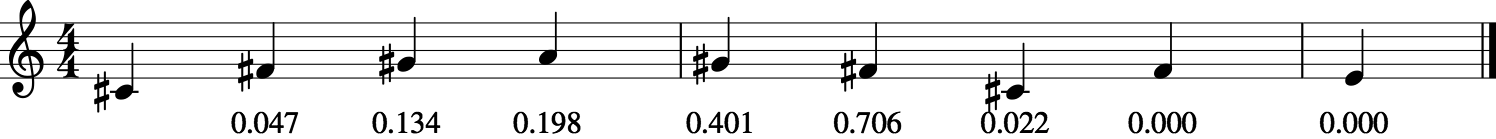

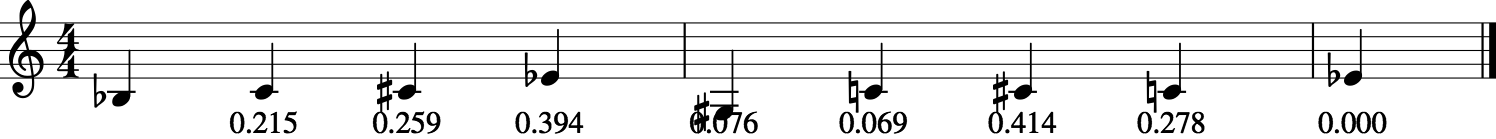

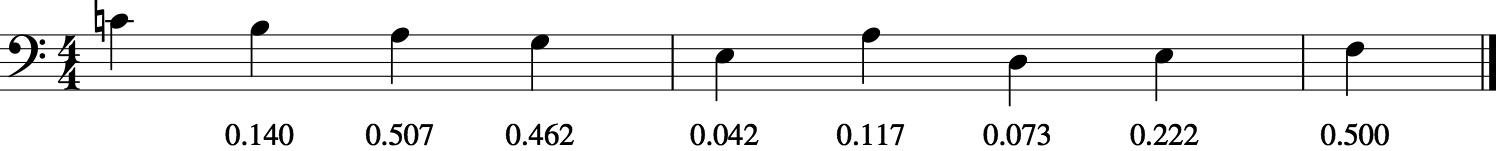

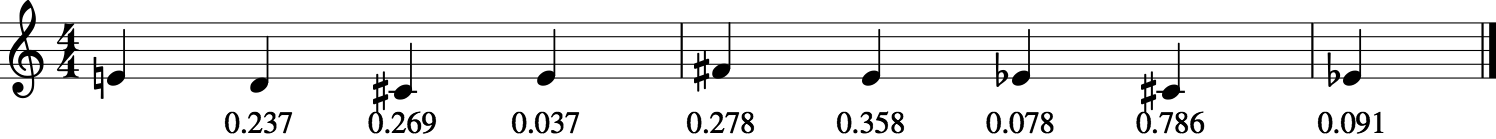

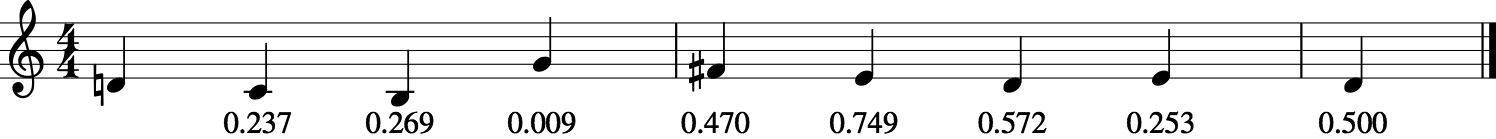

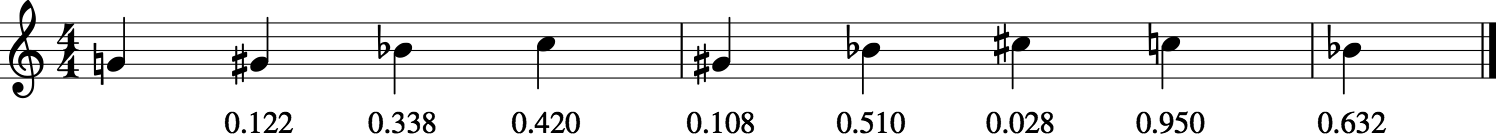

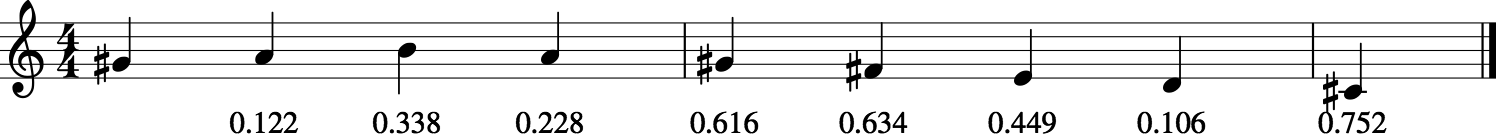

In [382]:
melStore = []
# Create Melodies based on the interval patterns
for intrvList, tP in zip(selectIntervals, selProbs):
    tProbsNote = conditProb(intrvBach, intrvList)
    if tP != 100:
        # turn the interval list into melodies
        melody = stream.Stream()
        nextNote = note.Note(np.random.randint(57,69))
        melody.append(nextNote)
        for nextIntrv, tPN in zip(intrvList, tProbsNote):
            nextNote = nextNote.transpose(nextIntrv)
            nextNote.lyric = '{:1.3f}'.format(tPN)
            melody.append(nextNote)
        melody.show()
        melStore.append(melody)

## Now include temporal jitter to adjust temporal predictability

Using `noiseParam` to adjust the amount of jitter added

In [381]:
testM = dc(melStore[4])
noiseParam = 0.05
for ind in np.arange(len(testM.notes)):
    thisNote = testM.notes[ind]
    if ind != 0:
        lastNote = testM.notes[ind-1]
        thisNote.offset = lastNote.offset + lastNote.quarterLength + float(np.round(np.random.randn(1)*noiseParam, 3))
testM.insertAndShift(0, r)
testM.show('midi')
